In [1]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print katdal.__version__

0.9


In [3]:
filename='/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/02/07/1518024630.h5'


In [4]:
h = katdal.open(filename)

In [5]:
print h

Name: /var/kat/archive3/data/MeerKATAR1/telescope_products/2018/02/07/1518024630.h5 (version 3.0)
Observer: Lindsay  Experiment ID: 20180207-0021
Description: 'MKAIV-405 Generic AR1 Phaseup'
Observed from 2018-02-07 19:30:31.305 SAST to 2018-02-07 19:34:25.206 SAST
Dump rate / period: 1.00042 Hz / 1.000 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m015,m016,m017,m018,m019,m027,m033,m043,m046,m047,m048,m050,m055,m058,m060,m061  32      544
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m018', 'm019', 'm043', 'm047', 'm046', 'm058', 'm061', 'm015', 'm016', 'm017', 'm060', 'm055', 'm033', 'm027', 'm050', 'm048']
  spw=0
----------------------------------------------------------

In [6]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  2
    cal_product_K  ---  2
    cal_product_G  ---  2


In [7]:
np.set_printoptions(precision=4,suppress=True)

In [8]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V214">
[['m015', 'm016', 'm017', 'm018', 'm019', 'm027', 'm033', 'm043', 'm046', 'm047', 'm048', 'm050', 'm055', 'm058', 'm060', 'm061']]
['m015' 'm016' 'm017' 'm018' 'm019' 'm027' 'm033' 'm043' 'm046' 'm047'
 'm048' 'm050' 'm055' 'm058' 'm060' 'm061']


# Delays

In [9]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [10]:
k_array.shape #Times,Pols,Antennas

(2, 2, 16)

In [11]:
# print delays (if there are few delays)
print 'POL 0: ', k_0
print 'POL 1: ', k_1

POL 0:  [[ 0.      0.0401 -0.0193 -0.0231 -0.0142 -0.0067 -0.0136 -0.     -0.0055
  -0.0164 -0.0189  0.0012 -0.0265 -0.0058 -0.0187 -0.0203]
 [-0.      0.0466  0.0007  0.0318  0.0112 -0.0034  0.0484  0.0667  0.044
   0.0675 -0.0394  0.071   0.0412  0.0034  0.0152  0.0035]]
POL 1:  [[-0.      0.0406 -0.0268 -0.0126 -0.0222 -0.0147 -0.0059 -0.0067 -0.0029
  -0.0118 -0.0171  0.0109 -0.0155 -0.0034 -0.0159 -0.0279]
 [-0.      0.0573 -0.0062  0.0309  0.0148 -0.0021  0.0335  0.0596  0.0553
   0.085  -0.0491  0.0712  0.0484  0.0127  0.017   0.0106]]


In [12]:
print labels

['m015' 'm016' 'm017' 'm018' 'm019' 'm027' 'm033' 'm043' 'm046' 'm047'
 'm048' 'm050' 'm055' 'm058' 'm060' 'm061']


In [13]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid',\
       'darkslategrey','crimson','goldenrod']

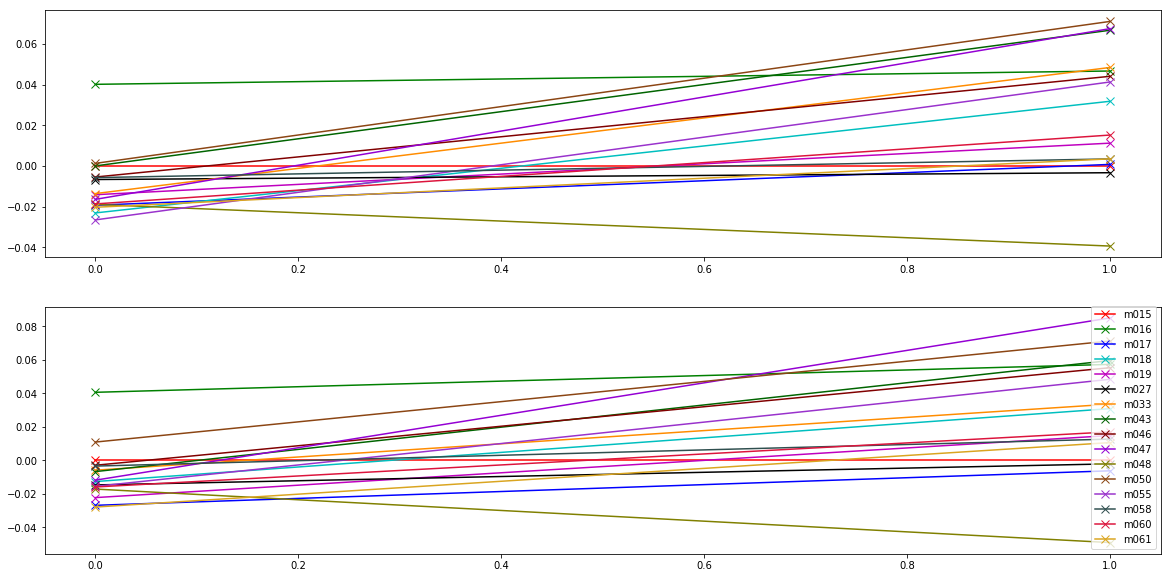

In [14]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='lower right')

In [15]:
print labels[5], k_0[0][5],k_1[0][5]
print labels[8], k_0[0][8],k_1[0][8]
print labels[9], k_0[0][9],k_1[0][9]
print labels[15], k_0[0][15],k_1[0][15]

m027 -0.0067050713 -0.014665821
m046 -0.005478414 -0.0029072373
m047 -0.016445244 -0.011809701
m061 -0.020338312 -0.027861519


# Gains

In [16]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(2, 2, 16)


In [17]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[1.9823 2.1042 1.5999 1.6442 1.7815 1.6231 2.32   2.1059 2.1529 1.5712
 1.9686 2.0216 2.2251 2.203  1.8189 2.3056]
[2.5347 1.6333 1.4565 2.1401 2.1013 1.8726 1.848  2.0167 2.1218 2.0993
 1.7479 1.8343 1.8119 1.8666 2.5151 2.2898]


In [18]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[1.8616 1.9931 1.5054 1.5439 1.6782 1.5347 2.1787 1.9752 2.0249 1.4781
 1.845  1.8952 2.0871 2.0691 1.7034 2.1719]
[2.4341 1.5728 1.4001 2.0598 2.0313 1.8003 1.7835 1.935  2.0372 2.0148
 1.6858 1.7639 1.7393 1.797  2.4126 2.2034]


In [19]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[0.9391 0.9472 0.9409 0.939  0.942  0.9455 0.9391 0.9379 0.9405 0.9407
 0.9372 0.9374 0.938  0.9393 0.9365 0.942 ]
[0.9603 0.963  0.9613 0.9625 0.9667 0.9614 0.9651 0.9595 0.9601 0.9598
 0.9645 0.9616 0.9599 0.9627 0.9593 0.9623]


In [20]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  0.     -17.6702   8.9043   9.9119   6.1344   3.9055   2.3573  -2.0698
  -1.438    5.6227   8.0713  -1.4998  11.3531   0.7866   7.1375  11.4547]
[  0.     -17.8635  12.4143   5.0865   9.8808   7.6435  -1.239    0.8821
  -2.4686   3.5071   7.4005  -6.0168   6.2643  -0.3709   5.8611  15.1407]


In [21]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[   0.      -30.4175   40.0261  -35.1644  -17.2084 -135.6476 -163.5339
  165.4017 -131.4058  -36.8387 -104.4817    1.4522  -96.1265   18.413
  -10.1748   33.3004]
[   0.      -29.8135   49.1723  -29.9749  -23.0212  -60.1384  -33.5875
   56.5198  -15.8553  -60.3926  151.0684  116.5854 -164.3936   36.0068
  -11.1999  -85.6775]


In [22]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[   0.      -12.7473   31.1218  -45.0762  -23.3428 -139.5532 -165.8912
  167.4715 -129.9677  -42.4614 -112.5529    2.952  -107.4796   17.6265
  -17.3123   21.8457]
[   0.      -11.95     36.7579  -35.0614  -32.902   -67.7819  -32.3484
   55.6377  -13.3868  -63.8997  143.6679  122.6023 -170.6579   36.3777
  -17.0609 -100.8182]


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


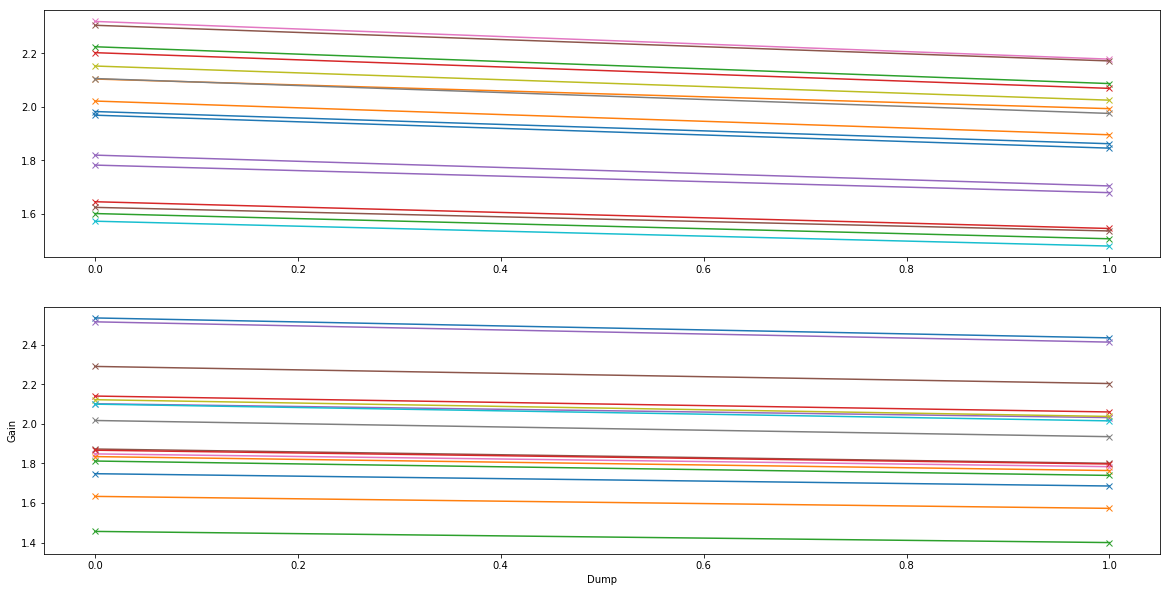

In [23]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

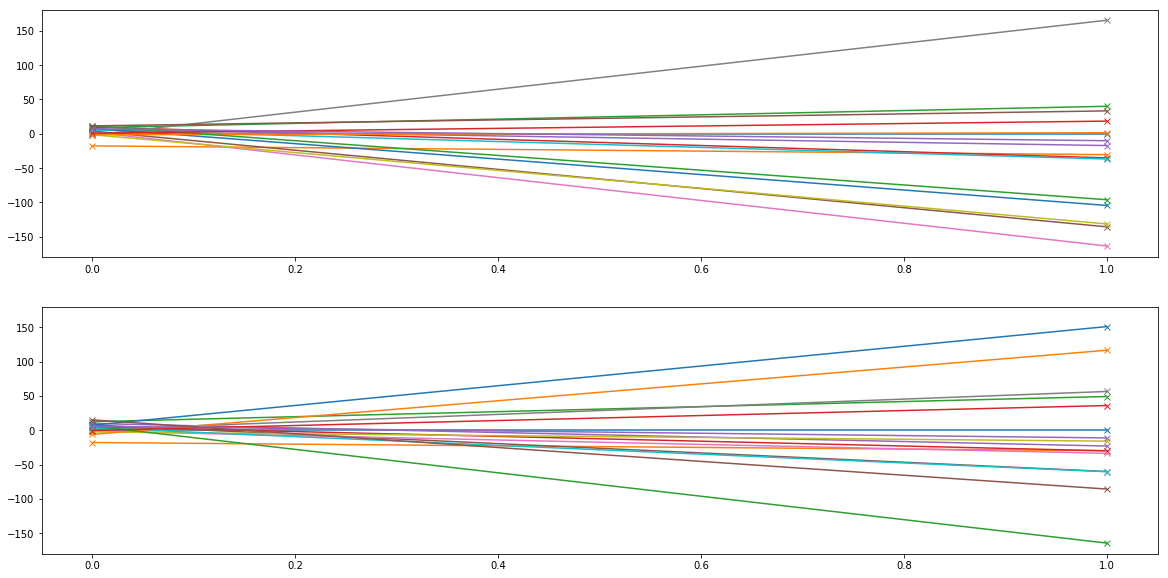

In [24]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [25]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(2, 4096, 2, 16)


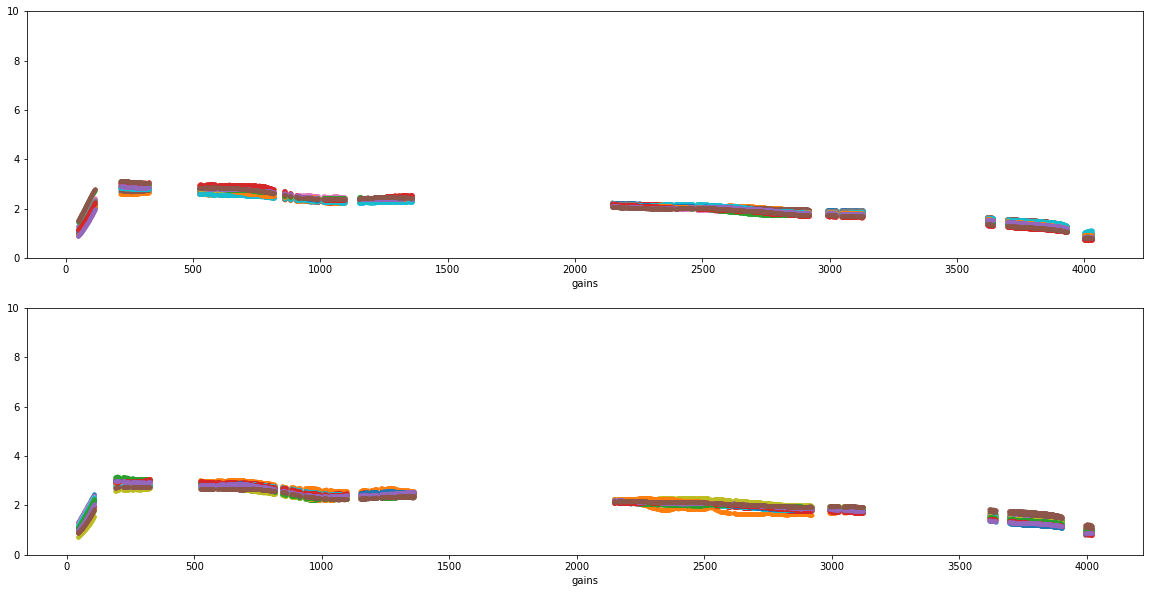

In [26]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

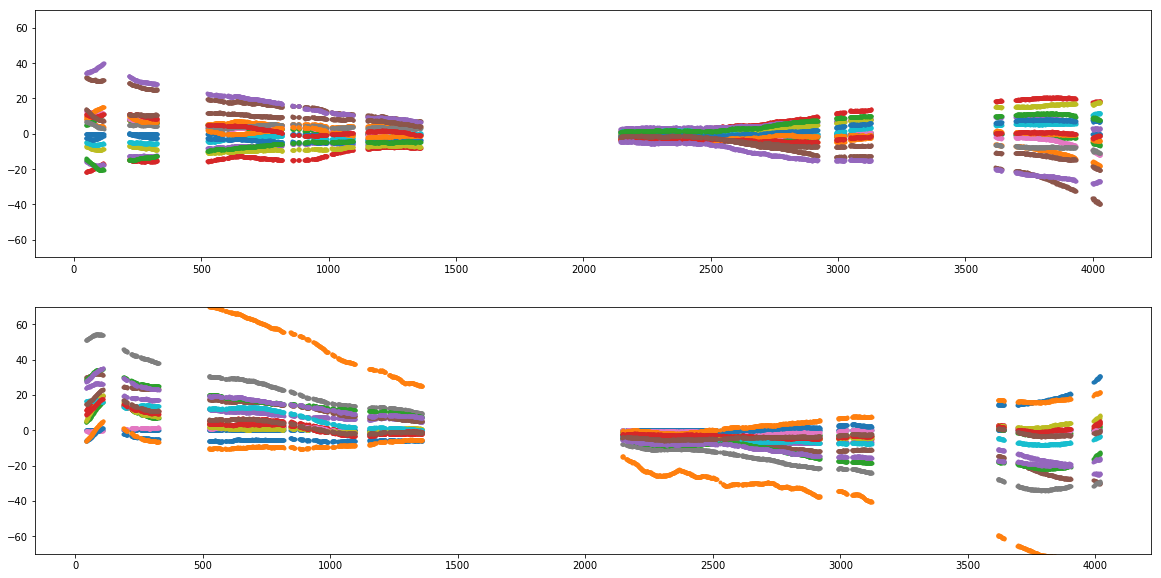

In [27]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
ax[1].set_ylim([-70,70]);

In [28]:
b_array.shape
# Time,channels,pols,antennas

(2, 4096, 2, 16)

In [29]:
#last bandpass
b_0_1 = b_array[0,:,0,8]
b_1_1 = b_array[0,:,1,8]
b_1_1.shape
print a_array[:,8]

['m046']


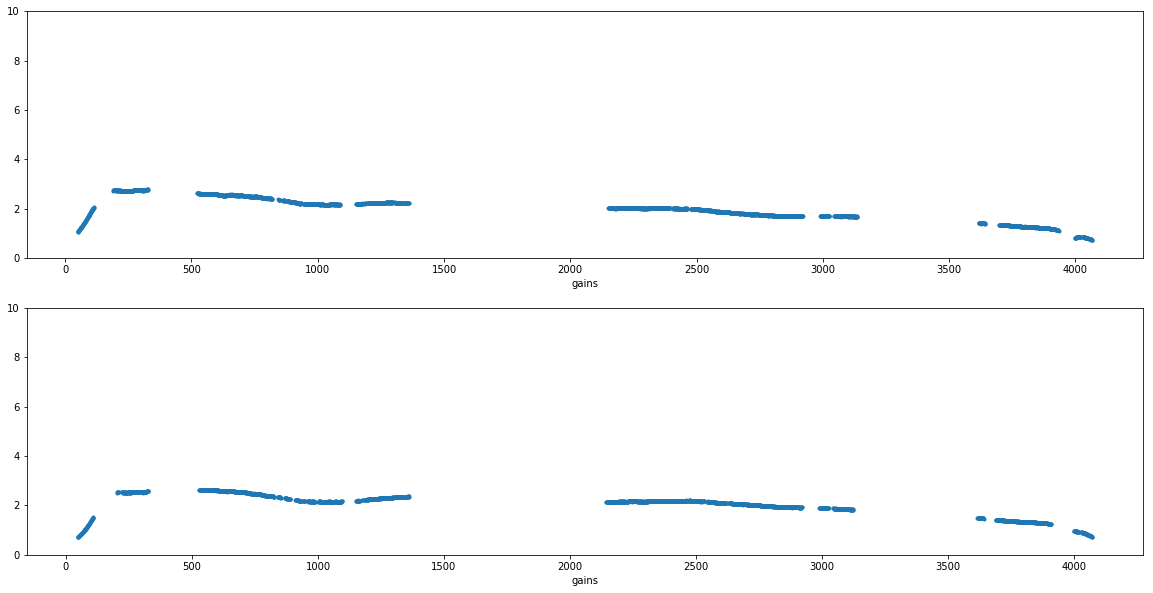

In [30]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

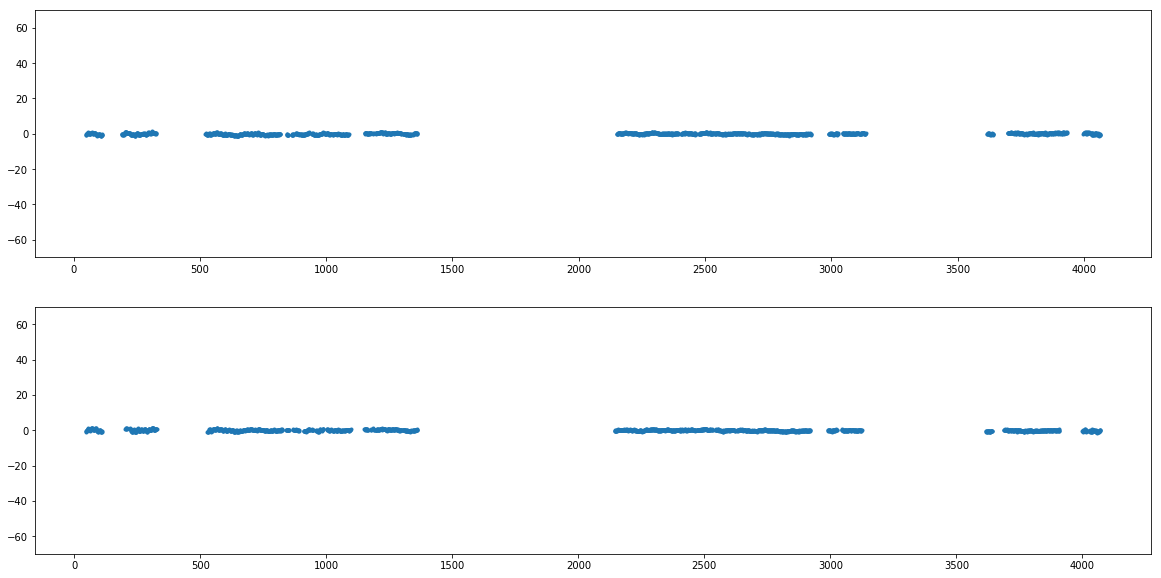

In [31]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);